# Intrest rates


In [1]:
# explore new data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:


df = pd.read_excel('20220919NOK.xlsx')
df = df.iloc[1:]
df = df.dropna(axis=1, how='all')
#df
names = df.iloc[:,::2].columns
date = df.loc[:, ['8Y']]
#df.iloc[:,1::2].rename(columns=dict(zip(names, date.values.flatten())), inplace=True)
date


df = df.iloc[:,1::2]
print(dict(zip(df.columns, names)))
df.columns = df.columns.map(dict(zip(df.columns, names)))



df["date"] = date
#df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

df.head()

{'Unnamed: 1': '3M', 'Unnamed: 4': '6M', 'Unnamed: 7': '1Y', 'Unnamed: 10': '2Y', 'Unnamed: 13': '3Y', 'Unnamed: 16': '4Y', 'Unnamed: 19': '5Y', 'Unnamed: 22': '6Y', 'Unnamed: 25': '7Y', 'Unnamed: 28': '8Y', 'Unnamed: 31': '9Y', 'Unnamed: 34': '10Y', 'Unnamed: 37': '12Y', 'Unnamed: 40': '15Y'}


,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,12Y,15Y
date,,,,,,,,,,,,,,
2005-01-03 00:00:00,1.99,2.03,2.2575,2.6825,3.0525,3.3425,3.6025,3.7925,3.9625,4.1025,4.2025,4.2925,4.415,4.535
2005-01-04 00:00:00,1.99,2.04,2.2575,2.6950,3.0450,3.3350,3.5750,3.7675,3.9325,4.0550,4.1600,4.2450,4.365,4.485
2005-01-05 00:00:00,1.99,2.05,2.2825,2.7350,3.0950,3.3800,3.6100,3.7950,3.9700,4.0950,4.2050,4.2900,4.385,4.505
2005-01-06 00:00:00,2.00,2.05,2.2725,2.7150,3.0850,3.3700,3.5875,3.7650,3.9350,4.0550,4.1550,4.2250,4.340,4.460
2005-01-07 00:00:00,1.98,2.03,2.2650,2.7050,3.0600,3.3400,3.5600,3.7350,3.8900,4.0050,4.1100,4.2025,4.325,4.445


In [3]:
df


,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,12Y,15Y
date,,,,,,,,,,,,,,
2005-01-03 00:00:00,1.99,2.03,2.2575,2.6825,3.0525,3.3425,3.6025,3.7925,3.9625,4.1025,4.2025,4.2925,4.415,4.535
2005-01-04 00:00:00,1.99,2.04,2.2575,2.6950,3.0450,3.3350,3.5750,3.7675,3.9325,4.0550,4.1600,4.2450,4.365,4.485
2005-01-05 00:00:00,1.99,2.05,2.2825,2.7350,3.0950,3.3800,3.6100,3.7950,3.9700,4.0950,4.2050,4.2900,4.385,4.505
2005-01-06 00:00:00,2.00,2.05,2.2725,2.7150,3.0850,3.3700,3.5875,3.7650,3.9350,4.0550,4.1550,4.2250,4.340,4.460
2005-01-07 00:00:00,1.98,2.03,2.2650,2.7050,3.0600,3.3400,3.5600,3.7350,3.8900,4.0050,4.1100,4.2025,4.325,4.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44817,NaN,NaN,NaN,3.6580,3.6200,3.5700,3.5370,3.5190,3.5110,3.5070,3.5020,3.4990,NaN,NaN
44818,NaN,NaN,NaN,3.6960,3.6520,3.5920,3.5420,3.5190,3.5050,3.4980,3.4930,3.4890,NaN,NaN
44819,NaN,NaN,NaN,3.7660,3.7075,3.6210,3.5400,3.5065,3.4870,3.4725,3.4650,3.4605,NaN,NaN


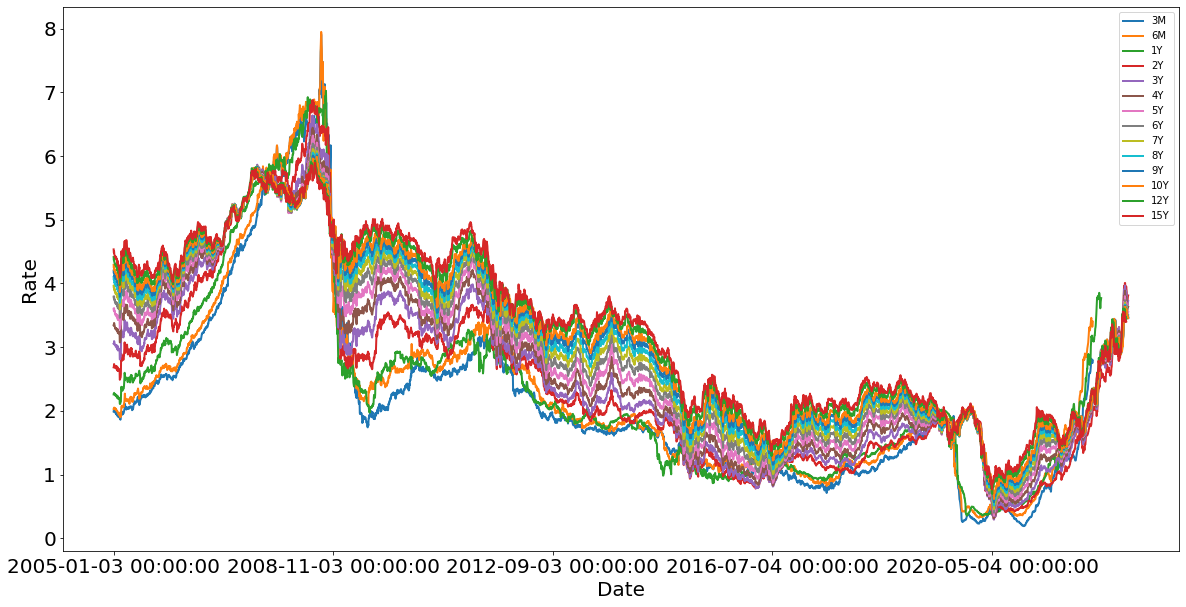

In [81]:
df.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Rate', fontsize=20)
plt.show()

In [82]:
def compare_yieldcurves(t1, t2):
    t = [3, 6, 1*12, 2*12, 3*12 ,4*12, 5*12, 6*12, 7*12, 8*12, 9*12, 10*12, 12*12, 15*12]
    df_t1 = df.loc[pd.to_datetime(t1)]
    df_t2 = df.loc[pd.to_datetime(t2)]
    plt.rcParams["figure.figsize"] = (15,7)
    plt.plot(t, df_t1.values, label=t1)
    plt.plot(t, df_t2.values, label=t2)
    plt.xlabel('Time to maturity')
    plt.ylabel('Rate')
    plt.legend()
    plt.show()

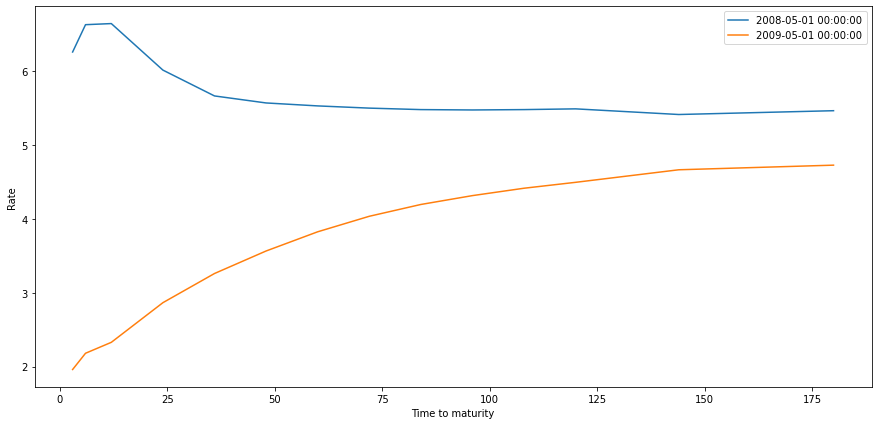

In [83]:


t1 = pd.to_datetime('2008-05-01')
t2 = pd.to_datetime('2009-05-01')
compare_yieldcurves(t1, t2)

We can see a clear correlation between the rates. From the names of the column names it seems as if the number indicates the length of the obligation and M/Y indicates Month/day. It makes sense that we get a lower rate for a shorter obligations. This makes sense because the future is uncertain.

During the housing bouble of 08 we see an increase in rates. This is common during a crisis, to manage inflation and stabilize the economi (?).

We see that for the time of the crash of 08 short intrest rates are higher then long ones. This is often an indication of a recession.

Now we plot a yield curves for around 2008 and 2009. 


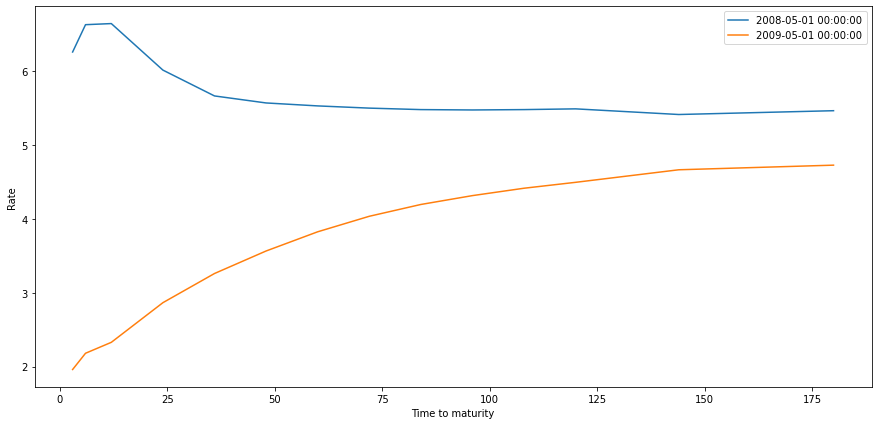

In [84]:
t1 = pd.to_datetime('2008-05-01')
t2 = pd.to_datetime('2009-05-01')
compare_yieldcurves(t1,t2)
#

The curve from 08 is an example of an decreasing (mixed) yield curve the curve from 09 is increasing.

Let´s look at `dr` for the different maturity times.

<AxesSubplot:xlabel='date'>

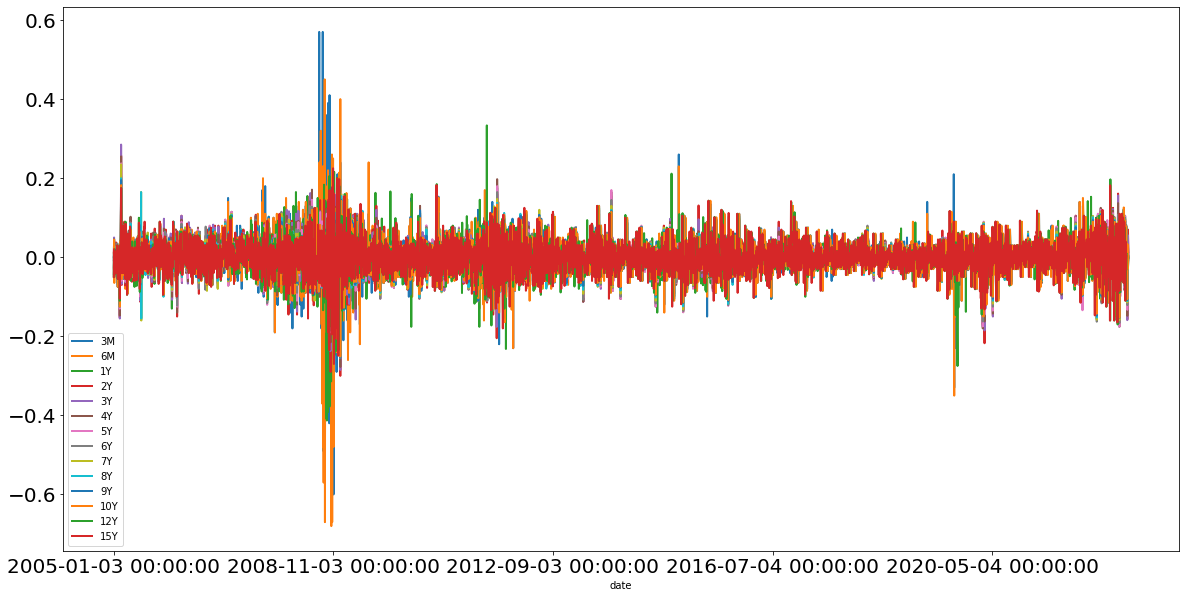

In [85]:
df_diff = df.diff(axis=0)
df_diff.plot(figsize=(20,10), linewidth=2, fontsize=20)


From the figure above differences between the rates are difficult to see. Lets look at plots of `dr` with short expiries vs long ones.

<AxesSubplot:xlabel='date'>

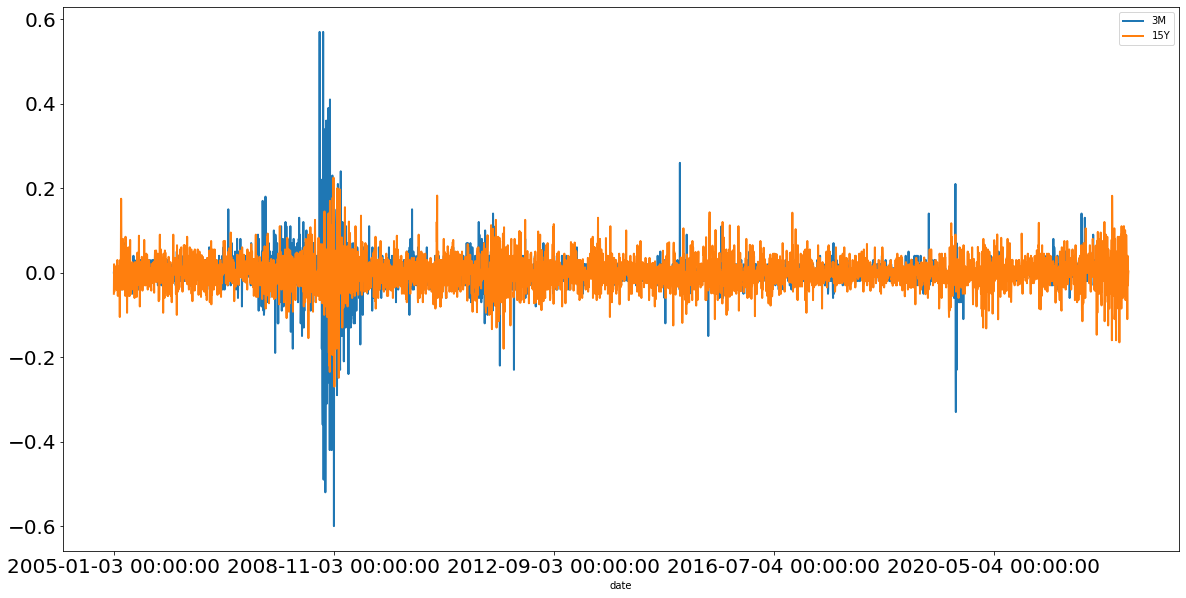

In [86]:
df_diff.iloc[:, [0, -1]] \
    .plot(figsize=(20,10), linewidth=2, fontsize=20)

It seems as the volatility of rates with long expiery is generaly longer then for short ones. This is not suprising since the future is uncertain. The volatility of short rates is higher then long ones, at times when the economy tanks. This is also not suprising since the future is uncertain, but the short term is more uncertain then the long term.

## Interest rate modelling

When modeling interest rates it is often assumed that the interestrate `r` follows a stochastic differential equation on the form

$$
dr = w(r,t) dX + u(r,t) dt
$$

where $w(r,t)$ and $u(r,t)$ determine the behaviour of the spot rate `r`. 

The first term is a diffusion term and the second term is a drift term. The diffusion term is a stochastic process that is independent of the drift term.
Now we assume that the SDE is of the form


$$
dr = (u-\lambda w) dt + w dX
$$

now assume that 
$$
u(r,t)-\lambda(r,t) w(r,t) = \eta(t) - \gamma(t) r \\
w(r,t) = \sqrt{\alpha(t) + \beta(t) r}
$$

This ensures positive interest rates if $\alpha(t) > 0$ and $\beta(t) \leq 0$. The lower bound of the interest rate is given by $-\frac{\beta}{\alpha}$.

### Vasicek model

The Vasicek model is a special case of the model above. The model assumes $\alpha = 0$, $\beta > 0$ and all other parameters independent of time:

$$
dr = \gamma(\eta - r) dt + \sqrt{\beta} dX
$$

The value of the zero-coupon bond is given by

$$
Z(t,T) = e^{A(t;T)-rB(t;T)}
$$

where

$$
B(t;T) = \frac{1}{\gamma} \left(1-e^{-\gamma(T-t)}\right) \\
A(t;T) = \frac{1}{\gamma^2} (B(t;T) - (T-t)) \left(\eta \gamma - \frac{\beta}{2}\right) - \frac{\beta}{2\gamma} B(t;T)^2
$$

Definitions:

$\sqrt{\beta} $: Instantaneous volatility

$\gamma$: Mean reversion speed

$\eta$: Long term mean level

we have that $E[dr] = \gamma(\eta - r) dt$. Thus, it can therefore be estimated by OLS.



We primarily want to look at two models. choose `3M` and `15Y` as the two maturity times. We want to look at the difference in rates between these two maturity times. We also want to look at the difference in the volatility of the two maturity times. We also want to look at the difference in the mean reversion speed of the two maturity times. We also want to look at the difference in the long term mean level of the two maturity times.

In [87]:
M3_complete_df = df_diff.iloc[:, [0]]
Y15_complete_df = df_diff.iloc[:, [-1]]
M3_complete_df = M3_complete_df.rename(columns={"3M": "3M_diff"})
Y15_complete_df = Y15_complete_df.rename(columns={"15Y": "15Y_diff"})
M3_complete_df["3M"] = df["3M"].copy().shift(1)
Y15_complete_df["15Y"] = df["15Y"].copy().shift(1)
M3_complete_df = M3_complete_df.dropna()
Y15_complete_df = Y15_complete_df.dropna()

In [88]:
import statsmodels.api as sm


def ols(x, y):
    x = sm.add_constant(x)
    OLS_model = sm.OLS(y, x).fit()
    # plot the regression and print the summary
    print(x)
    plt.scatter(x.iloc[:,-1], y)
    plt.plot(x.iloc[:,-1], OLS_model.predict(x), color='red')
    plt.show()
    print(OLS_model.summary())
    return OLS_model


                     const    3M
date                            
2005-01-04 00:00:00    1.0  1.99
2005-01-05 00:00:00    1.0  1.99
2005-01-06 00:00:00    1.0  1.99
2005-01-07 00:00:00    1.0  2.00
2005-01-10 00:00:00    1.0  1.98
...                    ...   ...
44592                  1.0  2.77
44593                  1.0  2.78
44594                  1.0  2.75
44595                  1.0  2.75
44596                  1.0  2.76

[4459 rows x 2 columns]


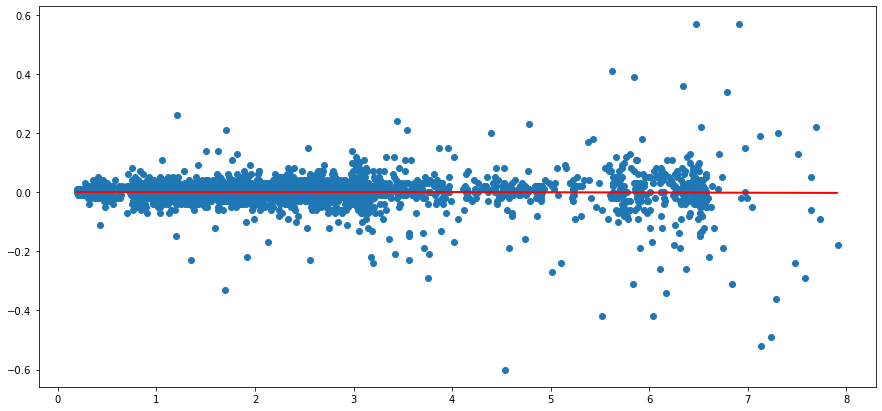

                            OLS Regression Results                            
Dep. Variable:                3M_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8256
Date:                Fri, 28 Oct 2022   Prob (F-statistic):              0.364
Time:                        14:43:11   Log-Likelihood:                 7765.1
No. Observations:                4459   AIC:                        -1.553e+04
Df Residuals:                    4457   BIC:                        -1.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.908      0.3

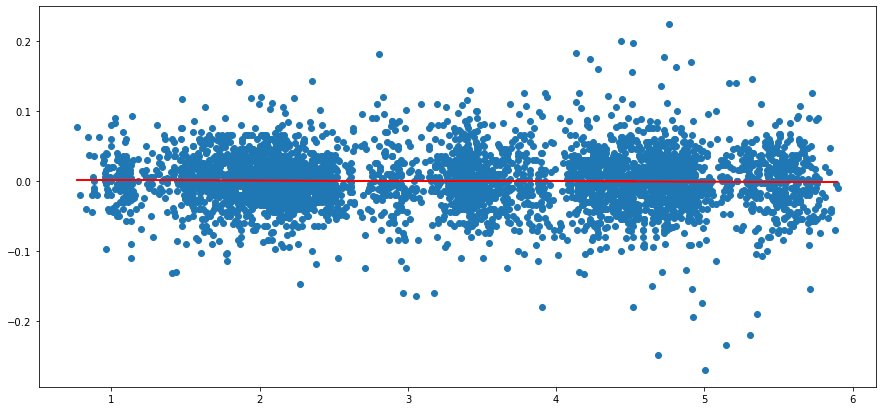

                            OLS Regression Results                            
Dep. Variable:               15Y_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.426
Date:                Fri, 28 Oct 2022   Prob (F-statistic):              0.232
Time:                        14:43:11   Log-Likelihood:                 8460.0
No. Observations:                4611   AIC:                        -1.692e+04
Df Residuals:                    4609   BIC:                        -1.690e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.002      0.945      0.3

In [89]:
# perform ols regression
M3_model = ols(M3_complete_df["3M"], M3_complete_df["3M_diff"])
#M3_coef = model.coef_[0][0]
#M3_intercept = model.intercept_[0]
# do the same as above for 15Y
Y15_model = ols(Y15_complete_df["15Y"], Y15_complete_df["15Y_diff"])
#Y15_coef = model.coef_[0][0]
#Y15_intercept = model.intercept_[0]


Both coefficients seem to be small and insignificant, but lets still use the estimated values.

From 

$$
\beta_0 + \beta_1 r = \gamma(\eta - r) dt
$$

We get that $\gamma dt = -\beta_1$ and $\eta dt = -\beta_0/\beta_1$. and the volatility is given by $\sqrt{\beta_1}$.


In [90]:
from cmath import sqrt


M3_gamma = -M3_model.params[1]
M3_eta = -M3_model.params[0]/M3_model.params[1]
Y15_gamma = -Y15_model.params[1]
Y15_eta = -Y15_model.params[0]/Y15_model.params[1]
# print the results
print("M3_gamma: ", M3_gamma)
print("M3_eta: ", M3_eta)
print("Y15_gamma: ", Y15_gamma)
print("Y15_eta: ", Y15_eta)

# find the variance of the residuals
M3_sd = np.sqrt( M3_model.mse_resid)
Y15_sd = np.sqrt( Y15_model.mse_resid)
print("M3_sd: ", M3_sd)
print("Y15_sd: ", Y15_sd)


M3_gamma:  0.0003884817726097198
M3_eta:  2.6182437039779667
Y15_gamma:  0.0005083497545681891
Y15_eta:  2.824661123701828
M3_sd:  0.042419454598659194
Y15_sd:  0.03863974651398125


Since the model above had no explainability on the data set lets try to do the same procedure with the Cox-Ingersoll-Ross model. 

### Cox-Ingersoll-Ross model

the model is on the form

$$
dr = \gamma(\eta - r) dt + \sqrt{\beta r} dX
$$

This can be rewritten on the form of a OLS regression model on the form:

$$
\frac{dr}{\sqrt{r}} = \frac{\gamma\eta dt}{\sqrt{r}} - \gamma dt \sqrt{r}  + \sqrt{\beta} dX
$$




In [91]:
# write a function that takes a sequence of rates as input and returns a dataframe containing all inputvalues nescary to estimate CIR parameters

def CIR(rates: pd.Series) -> pd.DataFrame:
    """
    Input:
        rates: a sequence of rates

    Output:
        params: A dataframe containing all the rates needed to estimate the parameters of the CIR model
    """

    
    df = pd.DataFrame()

    x2 = np.sqrt(rates.shift(1))
    x1 = 1/np.sqrt(rates.shift(1))
    y = rates.diff()
    df["y"] = y
    df["x1"] = x1
    df["x2"] = x2
    df = df.dropna()
    return df 

M3CIR = CIR(df["3M"])
Y15CIR = CIR(df["15Y"])

                           x1        x2
date                                   
2005-01-04 00:00:00  0.708881  1.410674
2005-01-05 00:00:00  0.708881  1.410674
2005-01-06 00:00:00  0.708881  1.410674
2005-01-07 00:00:00  0.707107  1.414214
2005-01-10 00:00:00  0.710669  1.407125
...                       ...       ...
44592                0.600842  1.664332
44593                0.599760  1.667333
44594                0.603023  1.658312
44595                0.603023  1.658312
44596                0.601929  1.661325

[4459 rows x 2 columns]


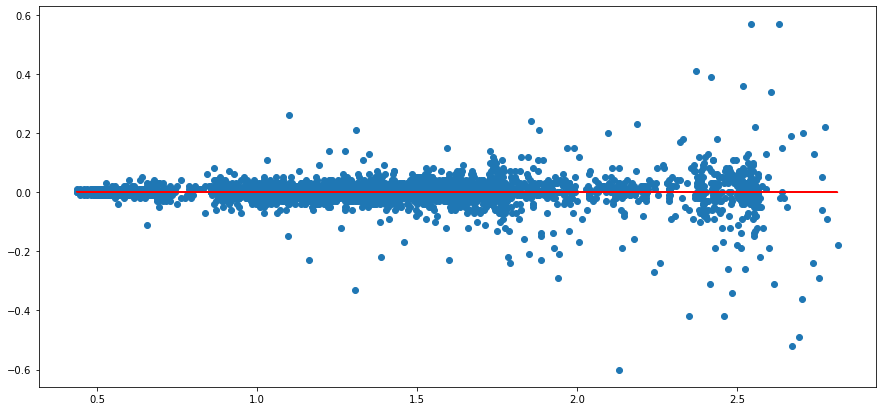

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.1431
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                       0.867
Time:                        14:43:12   Log-Likelihood:                          7764.7
No. Observations:                4459   AIC:                                 -1.553e+04
Df Residuals:                    4457   BIC:                                 -1.551e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

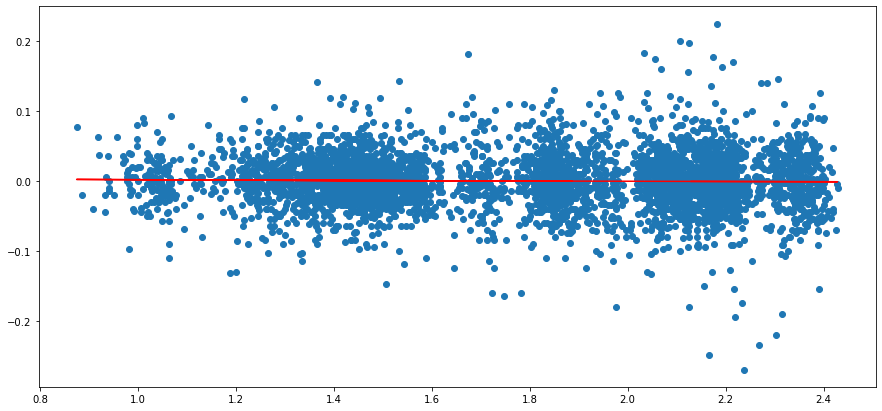

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8673
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                       0.420
Time:                        14:43:12   Log-Likelihood:                          8460.1
No. Observations:                4611   AIC:                                 -1.692e+04
Df Residuals:                    4609   BIC:                                 -1.690e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [92]:
def ols2(x, y):
    #x = sm.add_constant(x)
    OLS_model = sm.OLS(y, x).fit()
    # plot the regression and print the summary
    print(x)
    plt.scatter(x.iloc[:,-1], y)
    plt.plot(x.iloc[:,-1], OLS_model.predict(x), color='red')
    plt.show()
    print(OLS_model.summary())
    return OLS_model

M3CIR_model = ols2(M3CIR[["x1","x2"]], M3CIR["y"])
Y15CIR_model = ols2(Y15CIR[["x1","x2"]], Y15CIR["y"])

We see that parameters are more significant, but nothing that proves that the model follows the data.

<AxesSubplot:xlabel='date'>

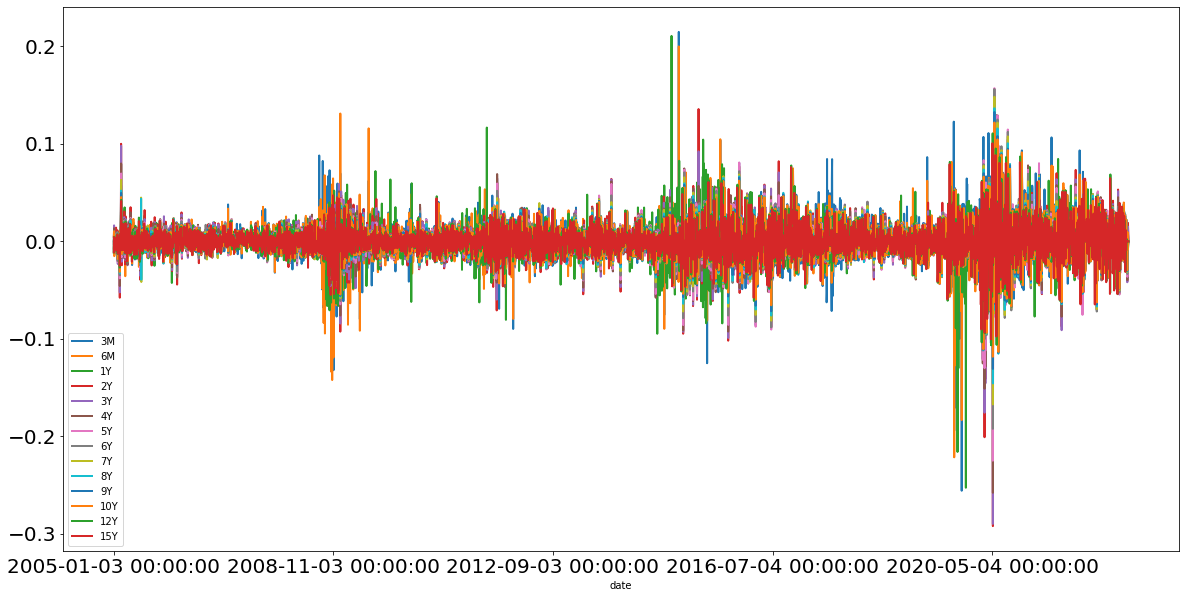

In [93]:
df.pct_change().plot(figsize=(20,10), linewidth=2, fontsize=20)

### PCA

In [102]:
df1 = df[df["3M"].notna()].copy()

In [105]:
# pca
from curses import KEY_FIND
from re import X
from sklearn.decomposition import PCA


x_pca = PCA(n_components=3).fit(df1)
#pca = PCA(n_components=3, svd_solver='full')
#x = pca.fit_transform(df.notna())
#x_pca = x_pca.fit_transform(df.dropna())
# plot variance explained by each component
#plt.plot(pca.explained_variance_ratio_, kind='bar')

# plot a bar chart of the variance explained by each component
print(x_pca.explained_variance_ratio_)



[0.95360838 0.03956872 0.00475614]


In [106]:
x_pca.components_

array([[ 0.26596081,  0.26892496,  0.27211098,  0.28285112,  0.27949957,
         0.27570231,  0.27221373,  0.26889016,  0.26572529,  0.26286697,
         0.26045242,  0.2584555 ,  0.25452266,  0.25146686],
       [ 0.47455194,  0.46579811,  0.4143372 ,  0.16886694,  0.05143586,
        -0.0304128 , -0.09126297, -0.13664683, -0.17174235, -0.19840489,
        -0.21963104, -0.23710515, -0.26466703, -0.28931668],
       [-0.3367202 , -0.30401736, -0.01828878,  0.47082211,  0.42577004,
         0.32060318,  0.20416403,  0.09894899,  0.00918591, -0.06500458,
        -0.12624832, -0.17543274, -0.27956112, -0.32781848]])

PC1 corresponds to the roughly the parallel shift in the yield curve.

PC2 corresponds to roughly a steepening in the yield curve.

In [109]:
vals

array([[ 2.38233707, -1.91578038, -0.22312464],
       [ 2.30108653, -1.84037083, -0.18708584],
       [ 2.41914617, -1.87035785, -0.15414682],
       ...,
       [-1.66881803,  2.4603947 , -0.46516805],
       [-1.4351849 ,  2.39695978, -0.36382741],
       [-1.34997879,  2.4257224 , -0.35310197]])

In [111]:
np.transpose(x_pca.components_)

array([[ 0.26596081,  0.47455194, -0.3367202 ],
       [ 0.26892496,  0.46579811, -0.30401736],
       [ 0.27211098,  0.4143372 , -0.01828878],
       [ 0.28285112,  0.16886694,  0.47082211],
       [ 0.27949957,  0.05143586,  0.42577004],
       [ 0.27570231, -0.0304128 ,  0.32060318],
       [ 0.27221373, -0.09126297,  0.20416403],
       [ 0.26889016, -0.13664683,  0.09894899],
       [ 0.26572529, -0.17174235,  0.00918591],
       [ 0.26286697, -0.19840489, -0.06500458],
       [ 0.26045242, -0.21963104, -0.12624832],
       [ 0.2584555 , -0.23710515, -0.17543274],
       [ 0.25452266, -0.26466703, -0.27956112],
       [ 0.25146686, -0.28931668, -0.32781848]])

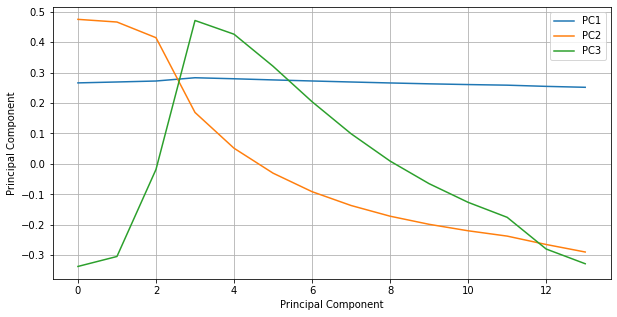

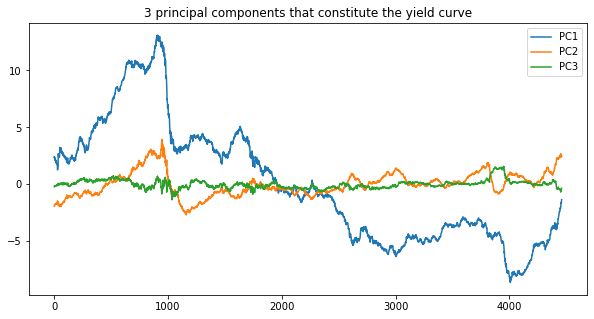

In [116]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Principal Component')
plt.plot(np.transpose(x_pca.components_), label = ['PC1', 'PC2', 'PC3'])
plt.legend()
plt.xlabel('Principal Component')
plt.grid(True)
plt.show()
vals = x_pca.transform(df1)


plt.figure(figsize=(10,5))
plt.title('3 principal components that constitute the yield curve')
plt.plot(vals[:,0:3], label = ['PC1', 'PC2', 'PC3'])
plt.legend()
plt.show()

In [117]:
df.dropna()

,3M,6M,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,12Y,15Y
date,,,,,,,,,,,,,,
2005-01-03 00:00:00,1.99,2.03,2.2575,2.6825,3.0525,3.3425,3.6025,3.7925,3.9625,4.1025,4.2025,4.2925,4.4150,4.5350
2005-01-04 00:00:00,1.99,2.04,2.2575,2.6950,3.0450,3.3350,3.5750,3.7675,3.9325,4.0550,4.1600,4.2450,4.3650,4.4850
2005-01-05 00:00:00,1.99,2.05,2.2825,2.7350,3.0950,3.3800,3.6100,3.7950,3.9700,4.0950,4.2050,4.2900,4.3850,4.5050
2005-01-06 00:00:00,2.00,2.05,2.2725,2.7150,3.0850,3.3700,3.5875,3.7650,3.9350,4.0550,4.1550,4.2250,4.3400,4.4600
2005-01-07 00:00:00,1.98,2.03,2.2650,2.7050,3.0600,3.3400,3.5600,3.7350,3.8900,4.0050,4.1100,4.2025,4.3250,4.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44592,2.78,3.39,3.1810,1.9060,2.0600,2.1170,2.1450,2.1590,2.1660,2.1690,2.1700,2.1690,2.3375,2.3410
44593,2.75,3.33,3.1250,1.9150,2.0563,2.1160,2.1450,2.1590,2.1660,2.1690,2.1700,2.1690,2.3510,2.3025
44594,2.75,3.32,3.1120,1.9180,2.0630,2.1150,2.1475,2.1530,2.1590,2.1610,2.1610,2.1600,2.3200,2.3125


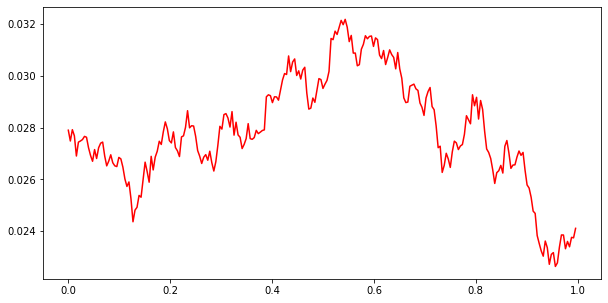

kappa:  0.09786029146690801
theta:  0.02617921463465999
sigma:  0.006732922053823867


In [131]:
def VasicekNextRate(r, kappa, theta, sigma, dt=1/252):
  # Implements above closed form solution
  val1 = np.exp(-1*kappa*dt)
  val2 = (sigma**2)*(1-val1**2) / (2*kappa)
  out = r*val1 + theta*(1-val1) + (np.sqrt(val2))*np.random.normal()
  return out
# Vasicek simulation short rate
def VasicekSim(N, r0, kappa, theta, sigma, dt = 1/252):
  short_r = [0]*N # Create array to store rates
  short_r[0] = r0 # Initialize rates at $r_0$
  for i in range(1,N):
    short_r[i]=VasicekNextRate(short_r[i-1],kappa, theta, sigma, dt)
  return short_r
# Vasicek multi-simulation
def VasicekMultiSim(M, N, r0, kappa, theta, sigma, dt = 1/252):
  sim_arr = np.ndarray((N, M))
  for i in range(0,M):
    sim_arr[:, i] = VasicekSim(N, r0, kappa, theta, sigma, dt)
  return sim_arr
# Maximum Likelihood Estimation to calibrate parameters
def VasicekCalibration(rates, dt=1/252):
  n = len(rates)
  Ax = sum(rates[0:(n-1)])
  Ay = sum(rates[1:n])
  Axx = np.dot(rates[0:(n-1)], rates[0:(n-1)])
  Axy = np.dot(rates[0:(n-1)], rates[1:n])
  Ayy = np.dot(rates[1:n], rates[1:n])
  theta = (Ay * Axx - Ax * Axy) / (n * (Axx - Axy) - (Ax**2 - Ax*Ay))
  kappa = -np.log((Axy - theta * Ax - theta * Ay + n * theta**2) / (Axx - 2*theta*Ax + n*theta**2)) / dt
  a = np.exp(-kappa * dt)
  sigmah2 = (Ayy - 2*a*Axy + a**2 * Axx - 2*theta*(1-a)*(Ay - a*Ax) + n*theta**2 * (1-a)**2) / n
  sigma = np.sqrt(sigmah2*2*kappa / (1-a**2))
  r0 = rates[n-1]
  return [kappa, theta, sigma, r0]

params=VasicekCalibration(df1["3M"].values/100)
kappa = params[0]
theta = params[1]
sigma = params[2]
r0 = params[3]
years = 1
N = years * 252
t = np.arange(0,N)/252
test_sim = VasicekSim(N, r0, kappa, theta, sigma, 1/252)
plt.figure(figsize=(10,5))
plt.plot(t,test_sim, color='r')
plt.show()
print("kappa: ", kappa)
print("theta: ", theta)
print("sigma: ", sigma)

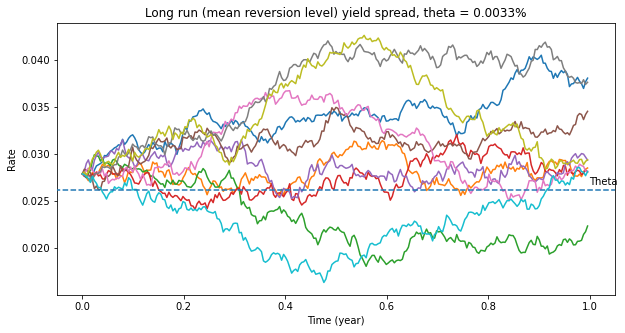

In [132]:
M = 10
rates_arr = VasicekMultiSim(M, N, r0, kappa, theta, sigma)
plt.figure(figsize=(10,5))
plt.plot(t,rates_arr)
plt.hlines(y=theta, xmin = -100, xmax=100, zorder=10, linestyles = 'dashed', label='Theta')
plt.annotate('Theta', xy=(1.0, theta+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (year)")
plt.title('Long run (mean reversion level) yield spread, theta = 0.0033%')
plt.show()